## UNIVERSIDAD CENTRAL

## Maestría en Analítica de datos

## Visualización para Analítica de datos

## Trabajo número dos

### Juan Guillermo Forero Neme

###  Miryam Leguizamón López


En la base de datos de la Agencia Nacional de Contratación Pública Colombia Compra Eficiente, como se vio en uno de los primeros cuadernos del curso, está alojada la información de los contratos hechos por departamento en diferentes áreas (Salud, Educación, etc.). El objetivo de este taller es que analice el comportamiento de la inversión en tales contratos por ciudad, departamento o región. Su primera tarea con dicha base de datos, será hacer una exploración profunda, de tal manera que usted pueda identificar algunos gráficos claves en los cuales muestre hechos relevantes sobre el ítem a estudiar. A medida que usted conoce la base de datos será capaz de generar algunos indicadores de desempeño que intervengan en la inversión en los contratos en las diferentes locaciones, explique cada uno de sus indicadores y justifique su importancia. Genere una base de datos en la que se encuentren los elementos necesarios para calcular sus indicadores de desempeño. Genere clusters, mediante un modelo, para clasificar los departamentos.

Entregables:
1.	Dashboard en el que se evidencie su tarea de exploración.
2.	KPI’s con sus respectivas explicaciones y justificaciones.
3.	Visualización del modelo dentro del Dashboard (puede ser un mapa de Colombia pintado según su modelo, es una sugerencia más no una camisa de fuerza, sienta plena libertad de hacer lo que usted considere adecuado).
4.	Fecha de Entrega: 15/05/2021


# Exploración de datos

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets
import statsmodels.formula.api as sm
import warnings
import openpyxl
warnings.filterwarnings("ignore")  # Elimina las advertencias
%matplotlib inline
sns.set()
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from ipywidgets import interact, Layout
import ipywidgets as widgets
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('SECOP_II_-_Contratos_Electr_nicos (2).csv')
df

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,...,Identificación Representante Legal,Género Representante Legal,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad
0,INSTITUTO COLOMBIANO DE ANTROPOLOGIA E HISTORIA,830067892,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Cultura,Ejecutivo,Centralizada,CO1.BDOS.1032040,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,01/30/2020 12:00:00 AM,701159022
1,Empresa Nacional Promotora del Desarrollo Terr...,899999316,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Nacional,Planeación,Corporación Autónoma,Centralizada,CO1.BDOS.1220223,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,03/10/2021 12:00:00 AM,700771157
2,DEFENSORÍA DEL PUEBLO,800186061,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Servicio Público,Corporación Autónoma,Centralizada,CO1.BDOS.1891420,...,No Definido,No Definido,41715000.0,0.0,0.0,0.0,0.0,0.0,04/19/2021 12:00:00 AM,702541384
3,SENA REGIONAL DISTRITO CAPITAL Grupo Administr...,899999034,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Nacional,Trabajo,Ejecutivo,Descentralizada,CO1.BDOS.1140736,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,12/21/2020 12:00:00 AM,704161728
4,Secretaria Distrital de Integración social...,8999990611,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Inclusión Social y Reconciliación,Ejecutivo,Centralizada,CO1.BDOS.1842902,...,No Definido,No Definido,0.0,20496000.0,0.0,0.0,0.0,0.0,04/23/2021 12:00:00 AM,702271321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013954,SUPERINTENDENCIA DE SERVICIOS PÚBLICOS DOMICIL...,800250984,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Planeación,Ejecutivo,No Definido,CO1.BDOS.1770815,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,15860000.0,02/15/2021 12:00:00 AM,700111024
1013955,GOBERNACIÓN DE BOLÍVAR,890480059,Bolívar,Turbaco,"Colombia, Bolívar, Turbaco",Territorial,Servicio Público,Ejecutivo,Descentralizada,CO1.BDOS.1932773,...,No Definido,No Definido,0.0,0.0,0.0,9000000.0,0.0,0.0,04/22/2021 12:00:00 AM,700961014
1013956,SECRETARIA DE INFRAESTRUCTURA Y VALORIZACION -...,8903990295,Valle del Cauca,Cali,"Colombia, Valle del Cauca , Cali",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.1930212,...,No Definido,No Definido,0.0,0.0,0.0,6000000.0,0.0,0.0,04/22/2021 12:00:00 AM,709412027
1013957,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,9009585649,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.371916,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,09/06/2018 12:00:00 AM,702730482


In [3]:
df.shape
df['Orden']
df1=df[df['Orden']=='Territorial']
df['Sector']
dfs=df[df['Sector']=='Salud y Protección Social']
dfs.head()
dfs.dtypes
dfs.columns

Index(['Nombre Entidad', 'Nit Entidad', 'Departamento', 'Ciudad',
       'Localización', 'Orden', 'Sector', 'Rama', 'Entidad Centralizada',
       'Proceso de Compra', 'ID Contrato', 'Referencia del Contrato',
       'Estado Contrato', 'Codigo de Categoria Principal',
       'Descripcion del Proceso', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Justificacion Modalidad de Contratacion',
       'Fecha de Firma', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
       'Fecha de Fin de Ejecucion', 'Condiciones de Entrega',
       'TipoDocProveedor', 'Documento Proveedor', 'Proveedor Adjudicado',
       'Es Grupo', 'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación',
       'Obligación Ambiental', 'Obligaciones Postconsumo', 'Reversion',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Val

In [4]:
dfs =dfs.fillna(0)
dfs

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,...,Identificación Representante Legal,Género Representante Legal,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad
6,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,9009585649,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.601331,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,04/24/2019 12:00:00 AM,702730482
13,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,900959048,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.1670074,...,No Definido,No Definido,0.0,0.0,0.0,10825517.0,0.0,0.0,04/30/2021 12:00:00 AM,702486788
32,DGSM-DISAN-ARC-HONAC,8300396705,Bolívar,Cartagena,"Colombia, Bolívar , Cartagena",Nacional,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.729250,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,12/28/2019 12:00:00 AM,701724114
40,SUBRED INTEGRADA DE SALUD CENTRO ORIENTE E.S.E,900959051,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.286391,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,06/26/2019 12:00:00 AM,702769076
45,SUBRED INTEGRADA DE SALUD CENTRO ORIENTE E.S.E,900959051,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.1726613,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,8564940.0,04/27/2021 12:00:00 AM,702769076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013937,ADMINISTRADORA DE LOS RECURSOS DEL SISTEMA GEN...,901037916,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Nacional,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.1684935,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,114131000.0,04/21/2021 12:00:00 AM,701594715
1013942,INSTITUTO DISTRITAL PARA LA PROTECCIÓN DE LA N...,899999333,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.1857654,...,No Definido,No Definido,0.0,0.0,0.0,25712400.0,0.0,0.0,04/19/2021 12:00:00 AM,700367014
1013945,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,900959048,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.1069363,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,02/08/2021 12:00:00 AM,702486788
1013957,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,9009585649,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.371916,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,09/06/2018 12:00:00 AM,702730482


In [5]:
#Separamos cuali de cuanti
cualicolumns=dfs.select_dtypes(exclude=['int64','float64']).columns
cuanticolumns=dfs.select_dtypes(include=['int64','float64']).columns
Fechas=[i for i in cualicolumns if i.count('Fecha')>0]
#cualicolumns=[i for i in cualicolumns if i.count('Fecha')<=0]
#cualicolumns
#lista=dfs[['Rama', 'Entidad Centralizada', 'Estado Contrato', 'Tipo de



lista=dfs[['Rama','Entidad Centralizada','Tipo de Contrato', 'Es Grupo', 'Es Pyme', 'Destino Gasto']]


In [6]:
def distrib(i):
    Freq=lista[i].value_counts()
    if len(lista[i].unique())<10:
        fig = go.Figure(data=[go.Pie(labels=Freq.index, values=Freq.values,hole=.3,title=i)])
        fig.show()
    else:
        fig = go.Figure(data=[go.Table(
            columnwidth = [500,100,100],
            header=dict(values=['Categoría','Cantidad','Porcentaje'],
                        fill_color='paleturquoise',
                        align='left'),
            cells=dict(values=[Freq.index, Freq.values,["{:.2%}".format(i) for i in Freq.values/len(lista)]],
                       fill_color='lavender',
                       align='left'))
                             ])
        fig.show()
    return

interact(distrib,i=widgets.Dropdown(options=lista,value='Entidad Centralizada',description='Variable: '))
#distrib('Valor Facturado')

interactive(children=(Dropdown(description='Variable: ', index=1, options=('Rama', 'Entidad Centralizada', 'Ti…

<function __main__.distrib(i)>

In [7]:
for i in Fechas:
    dfs[i]=pd.to_datetime(dfs[i])
dfs[Fechas].dtypes

Fecha de Firma                  datetime64[ns]
Fecha de Inicio del Contrato    datetime64[ns]
Fecha de Fin del Contrato       datetime64[ns]
Fecha de Inicio de Ejecucion    datetime64[ns]
Fecha de Fin de Ejecucion       datetime64[ns]
dtype: object

In [8]:
estadist=dfs.describe().astype(float)
estadist

,Nit Entidad,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Amortizado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Saldo CDP,Saldo Vigencia,Dias Adicionados,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Codigo Entidad
count,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,164356.0,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,164356.000000,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05
mean,2.602337e+09,1.621552e+11,3.996449e+03,3.312771e+06,1.650056e+11,2.804335e+06,0.0,3.996449e+03,1.650061e+11,2.786936e+10,1.463311e+09,32.788526,3.941630e+07,1.345333e+06,2.506278e+05,4.953893e+10,4.680853e+05,1.237974e+07,7.027277e+08
std,3.258756e+09,2.194116e+13,9.999561e+05,7.671944e+07,2.195003e+13,7.289814e+07,0.0,9.999561e+05,2.195003e+13,3.108812e+11,4.523795e+10,74.568365,5.304496e+08,1.139803e+08,2.680632e+07,1.419272e+13,8.434424e+07,3.966539e+08,1.378214e+06
min,8.445852e+07,0.000000e+00,0.000000e+00,0.000000e+00,-8.048397e+07,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.001200e+08
25%,8.999992e+08,5.778080e+06,0.000000e+00,0.000000e+00,5.156343e+06,0.000000e+00,0.0,0.000000e+00,5.385258e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.024868e+08
50%,9.009591e+08,1.525948e+07,0.000000e+00,0.000000e+00,1.414697e+07,0.000000e+00,0.0,0.000000e+00,1.466403e+07,6.660553e+07,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.027295e+08
75%,9.009710e+08,3.448365e+07,0.000000e+00,0.000000e+00,3.100000e+07,0.000000e+00,0.0,0.000000e+00,3.359633e+07,5.700000e+09,0.000000e+00,31.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.027691e+08
max,9.013621e+09,6.158662e+15,3.425400e+08,2.170698e+10,6.158662e+15,2.170698e+10,0.0,3.425400e+08,6.158662e+15,2.200750e+13,2.250809e+12,1037.000000,1.052034e+11,2.941123e+10,6.228039e+09,4.068597e+15,1.975173e+10,8.644095e+10,7.132801e+08


In [9]:
mediarecortada=[]
quantil90=[]
for i in estadist.columns:
    mediarecortada.append(stats.trim_mean(dfs[i],0.1))

estadist.loc['med_rec']=mediarecortada
estadist.loc['quantil95']=dfs.quantile(0.95)
estadist

,Nit Entidad,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Amortizado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Saldo CDP,Saldo Vigencia,Dias Adicionados,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Codigo Entidad
count,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,164356.0,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,164356.000000,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05,1.643560e+05
mean,2.602337e+09,1.621552e+11,3.996449e+03,3.312771e+06,1.650056e+11,2.804335e+06,0.0,3.996449e+03,1.650061e+11,2.786936e+10,1.463311e+09,32.788526,3.941630e+07,1.345333e+06,2.506278e+05,4.953893e+10,4.680853e+05,1.237974e+07,7.027277e+08
std,3.258756e+09,2.194116e+13,9.999561e+05,7.671944e+07,2.195003e+13,7.289814e+07,0.0,9.999561e+05,2.195003e+13,3.108812e+11,4.523795e+10,74.568365,5.304496e+08,1.139803e+08,2.680632e+07,1.419272e+13,8.434424e+07,3.966539e+08,1.378214e+06
min,8.445852e+07,0.000000e+00,0.000000e+00,0.000000e+00,-8.048397e+07,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.001200e+08
25%,8.999992e+08,5.778080e+06,0.000000e+00,0.000000e+00,5.156343e+06,0.000000e+00,0.0,0.000000e+00,5.385258e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.024868e+08
50%,9.009591e+08,1.525948e+07,0.000000e+00,0.000000e+00,1.414697e+07,0.000000e+00,0.0,0.000000e+00,1.466403e+07,6.660553e+07,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.027295e+08
75%,9.009710e+08,3.448365e+07,0.000000e+00,0.000000e+00,3.100000e+07,0.000000e+00,0.0,0.000000e+00,3.359633e+07,5.700000e+09,0.000000e+00,31.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.027691e+08
max,9.013621e+09,6.158662e+15,3.425400e+08,2.170698e+10,6.158662e+15,2.170698e+10,0.0,3.425400e+08,6.158662e+15,2.200750e+13,2.250809e+12,1037.000000,1.052034e+11,2.941123e+10,6.228039e+09,4.068597e+15,1.975173e+10,8.644095e+10,7.132801e+08
med_rec,2.022030e+09,1.990862e+07,0.000000e+00,0.000000e+00,1.851906e+07,0.000000e+00,0.0,0.000000e+00,1.925772e+07,3.450818e+09,0.000000e+00,11.797378,0.000000e+00,0.000000e+00,0.000000e+00,2.611252e+03,0.000000e+00,9.353236e+05,7.026800e+08
quantil95,9.009586e+09,2.814777e+08,0.000000e+00,9.520000e+06,2.590759e+08,6.460000e+06,0.0,0.000000e+00,2.571931e+08,6.750000e+10,0.000000e+00,215.000000,3.819333e+07,0.000000e+00,0.000000e+00,1.504985e+07,0.000000e+00,2.425000e+07,7.041926e+08


In [10]:
ncontracts=dfs[dfs['Valor del Contrato']<215000000]




In [11]:
from datetime import datetime, timedelta
ncontracts=ncontracts[(ncontracts['Fecha de Inicio del Contrato']>= datetime(year=2015,month=1,day=1))]
                      
ncontracts['Fecha de Inicio del Contrato']
df2=dfs[dfs['Rama']=='Legislativo']
df2


,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,...,Identificación Representante Legal,Género Representante Legal,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad
148,HOSPITAL FEDERICO LLERAS ACOSTA DE IBAGUE TOLI...,890706833,Tolima,Ibagué,"Colombia, Tolima , Ibagué",Territorial,Salud y Protección Social,Legislativo,Descentralizada,CO1.BDOS.1204708,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,03/17/2021 12:00:00 AM,700665045
2545,HOSPITAL FEDERICO LLERAS ACOSTA DE IBAGUE TOLI...,890706833,Tolima,Ibagué,"Colombia, Tolima , Ibagué",Territorial,Salud y Protección Social,Legislativo,Descentralizada,CO1.BDOS.1555015,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,23649084.0,04/06/2021 12:00:00 AM,700665045
2809,HOSPITAL FEDERICO LLERAS ACOSTA DE IBAGUE TOLI...,890706833,Tolima,Ibagué,"Colombia, Tolima , Ibagué",Territorial,Salud y Protección Social,Legislativo,Descentralizada,CO1.BDOS.1628371,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,4400000.0,02/24/2021 12:00:00 AM,700665045
3301,HOSPITAL FEDERICO LLERAS ACOSTA DE IBAGUE TOLI...,890706833,Tolima,Ibagué,"Colombia, Tolima , Ibagué",Territorial,Salud y Protección Social,Legislativo,Descentralizada,CO1.BDOS.1636155,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,8235000.0,04/12/2021 12:00:00 AM,700665045
3862,HOSPITAL FEDERICO LLERAS ACOSTA DE IBAGUE TOLI...,890706833,Tolima,Ibagué,"Colombia, Tolima , Ibagué",Territorial,Salud y Protección Social,Legislativo,Descentralizada,CO1.BDOS.1811020,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,11716870.0,04/15/2021 12:00:00 AM,700665045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011264,HOSPITAL FEDERICO LLERAS ACOSTA DE IBAGUE TOLI...,890706833,Tolima,Ibagué,"Colombia, Tolima , Ibagué",Territorial,Salud y Protección Social,Legislativo,Descentralizada,CO1.BDOS.1238825,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,89626750.0,08/21/2020 12:00:00 AM,700665045
1012124,HOSPITAL FEDERICO LLERAS ACOSTA DE IBAGUE TOLI...,890706833,Tolima,Ibagué,"Colombia, Tolima , Ibagué",Territorial,Salud y Protección Social,Legislativo,Descentralizada,CO1.BDOS.1544855,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,4797000.0,04/19/2021 12:00:00 AM,700665045
1013342,HOSPITAL FEDERICO LLERAS ACOSTA DE IBAGUE TOLI...,890706833,Tolima,Ibagué,"Colombia, Tolima , Ibagué",Territorial,Salud y Protección Social,Legislativo,Descentralizada,CO1.BDOS.950538,...,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,02/28/2020 12:00:00 AM,700665045
1013668,HOSPITAL FEDERICO LLERAS ACOSTA DE IBAGUE TOLI...,890706833,Tolima,Ibagué,"Colombia, Tolima , Ibagué",Territorial,Salud y Protección Social,Legislativo,Descentralizada,CO1.BDOS.1649323,...,No Definido,No Definido,0.0,0.0,0.0,49440000.0,0.0,0.0,04/15/2021 12:00:00 AM,700665045


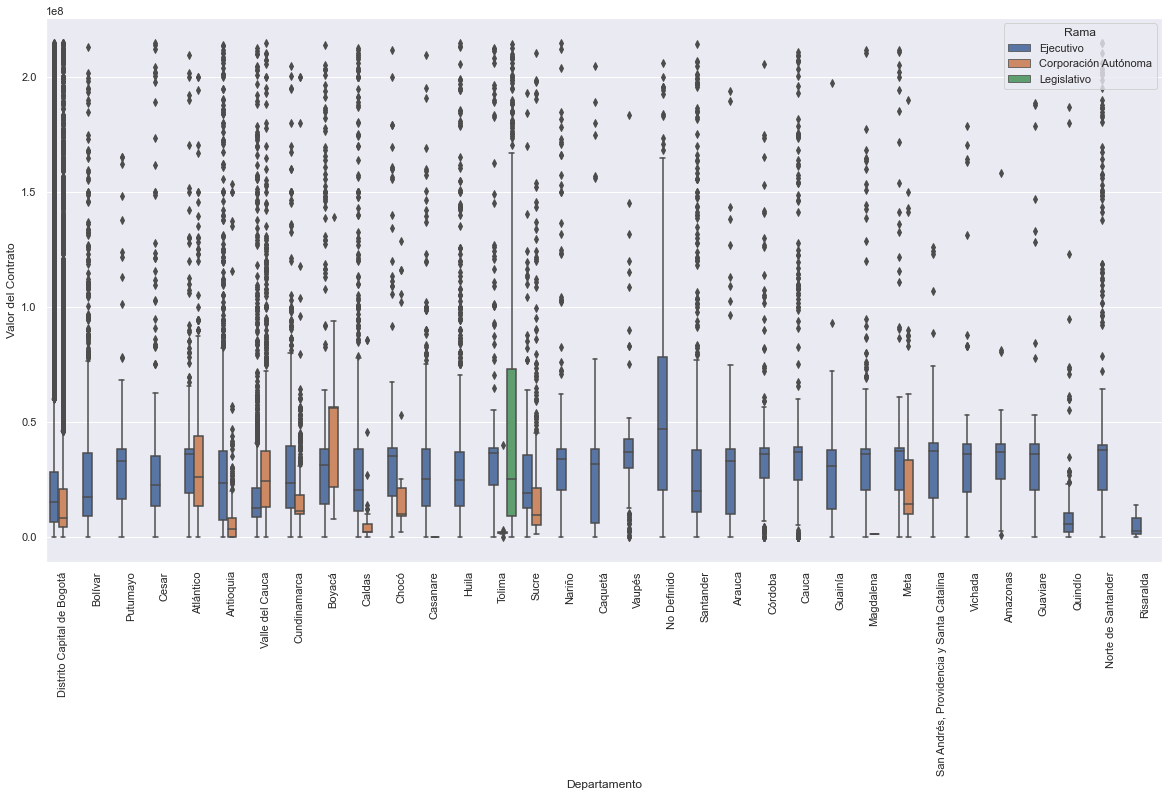

In [ ]:
fig, axs = plt.subplots(figsize=(20,10))
axs=sns.boxplot(data=ncontracts,y='Valor del Contrato',x="Departamento", hue='Rama')
axs.set_xticklabels(axs.get_xticklabels(), rotation=90);

In [ ]:
fig, axs = plt.subplots(figsize=(20,10))
axs=sns.barplot(y=ncontracts.groupby(by='Departamento').sum()['Valor del Contrato'].values,x=ncontracts.groupby(by='Departamento').sum()['Valor del Contrato'].index)
axs.set_xticklabels(axs.get_xticklabels(), rotation=90);

In [ ]:
g = sns.displot(
    data=ncontracts, y="Valor del Contrato", hue="Rama", col="Departamento",col_wrap=4)
g.set_titles("{col_name}")
g.set(ylim=(-1e7,1e8))

g = sns.displot(
    data=ncontracts, y="Valor del Contrato", hue="Entidad Centralizada", col="Departamento",col_wrap=4)
g.set_titles("{col_name}")
g.set(ylim=(-1e7,1e8))

# Indicadores

Se definen los siguientes indicadores por departamento:

## * Total de inversión por mil personas
Este indicador permite conocer la inversión territorial de cada departamento por cada mil personas. Permite estandarizar la inversión de acuerdo con la población de cada departemento, lo que hace que la inversión sea analizada de manera objetiva. 

**Fórmula:**

$$\frac{\sum \left(v\right)}{\frac{n}{1000}}$$ 


donde $v$ es el valor de cada uno de los contratos en los departamentos y $n$ es la población estimada de acuerdo con las proyecciones del DANE para cada departamento.


## Inversión de la rama ejecutiva por cada mil personas

Este indicador permite conocer la inversión territorial de cada departamento por cada mil personas de la rama ejecutiva. Permite estandarizar la inversión de acuerdo con la población de cada departemento, lo que hace que la inversión sea analizada de manera objetiva. 

**Fórmula:**

$$\frac{\sum \left(m\right)}{\frac{n}{1000}}$$ 


donde $m$ es el valor de cada uno de los contratos en los departamentos de la rama ejecutiva y $n$ es la población estimada de acuerdo con las proyecciones del DANE para cada departamento.
## Duración promedio de los contratos

Este es una característica de los contratos, que permite identificar el tiempo medio en días de los contratos terminados y analizar con más detalle las inversiones y las diferencias de los mismos por cada departamento.

**Fórmula:**

$$\frac{\sum \left(d\right)}{i}$$ 


donde $d$ es el la duración en días de cada uno de los $i$ contratos en los departamentos 


## Costo mínimo de contratos día

Esta caracacterística de los contratos permite conocer el costo mínimo por dia que tienen los contratos de cada departamento. Este indicador analizado y comparado en cada departamento puede dar idea de valore atipicos o raros en cada departamento.

**Fórmula:**


$$\min{\frac{\sum \left(v\right)}{d}}$$


donde $v$ es el valor de cada uno de los contratos de los departamentos y $d$ la duración en días de cada uno

## Costo medio de contratos dia

El calculo de este indicador permie conocer en media el costo día que tienen los contratos de cda departamento y de esta manera ser conparables entre si con el fin de idnetificar similitudes y diferencias

**Fórmula:**

$Mediana($$\frac{\sum \left(v\right)}{d}$$)$


donde $v$ es el valor de cada uno de los contratos de los departamentos y $d$ la duración en días de cada uno

## Percentil 75 del costo de contratos dia
El calculo de este indicador permie conocer la concentración de del costo día de los contratos por cada departamento lo que a su vez facilita el análisis comparativo y la detección de posibles anomalías o valores atípicos.

**Fórmula:**

$Percent.75($$\frac{\sum \left(v\right)}{d}$$)$


donde $v$ es el valor de cada uno de los contratos de los departamentos y $d$ la duración en días de cada uno




In [ ]:
poblacion = pd.read_excel('Poblacionf.xlsx')
poblaciono = sorted(poblacion['Departamento'])
poblaciono

In [ ]:
Invdep= ncontracts[['Valor del Contrato', 'Departamento']].groupby('Departamento').sum(['Valor del Contrato'])

#g=dfs[dfs['Departamento']=='La Guajira']
#mm= g[['Valor del Contrato', 'Departamento']].groupby('Departamento').sum(['Valor del Contrato'])
#mm
##Guajira tiene un solo contrato de 400 millones
Invdep

In [ ]:
base1=pd.merge(Invdep,poblacion,on='Departamento')
#m=base1[['Departamento']].groupby('Departamento').sum('Valor del contrato')
base1

In [ ]:
ind1= round(base1['Valor del Contrato'] / (base1['Poblacion 2020'])/1000,2)

In [ ]:
base1['ind1'] = ind1
base1

In [ ]:
fig, axs = plt.subplots(figsize=(20,10))
axs=sns.barplot(data=base1,y='ind1',x="Departamento")
axs.set_xticklabels(axs.get_xticklabels(), rotation=90);

In [ ]:
#Indicador 2
# Filtramos rama = ejecutivo
eje=ncontracts[ncontracts['Rama']=="Ejecutivo"]
eje
valor=eje[['Valor del Contrato', 'Departamento']].groupby('Departamento').sum(['Valor del Contrato'])
valor


In [ ]:
base2=pd.merge(valor,base1,on='Departamento')
#m=base1[['Departamento']].groupby('Departamento').sum('Valor del contrato')
base2

In [ ]:
ind2= round(base2['Valor del Contrato_x'] / (base1['Poblacion 2020'])/1000,2)


In [ ]:
base2['ind2'] = ind2
base2


In [ ]:
ncontracts.columns

In [ ]:
#Indicador 3
from datetime import datetime, timedelta
dif= ncontracts['Fecha de Fin del Contrato']-ncontracts['Fecha de Inicio del Contrato']
dur=dif/timedelta(days=1)
ncontracts['duracion'] = dur
ncontracts
ind3=ncontracts[['duracion', 'Departamento']].groupby('Departamento').mean(['duracion'])
ind3

In [ ]:
base3=pd.merge(base2,ind3,on='Departamento')
base3

In [ ]:
#Indicador 4-- valor minimo dia por departamento
valord=(ncontracts['Valor del Contrato']/ncontracts['duracion'])
ncontracts['ind4'] = valord
ind4=ncontracts[['ind4', 'Departamento']].groupby('Departamento').min(['ind4'])
ind4



In [ ]:
base4=pd.merge(base3,ind4,on='Departamento')
base4

In [ ]:
ind5=ncontracts[['ind4', 'Departamento']].groupby('Departamento').median(['ind4'])
ind5
#q=ncontracts[['Departamento', 'ind4']].quantile([.75])
ind6=ncontracts[['ind4', 'Departamento']].groupby('Departamento').quantile([.75])
ind6

In [ ]:
base5=pd.merge(base4,ind5,on='Departamento')
basef=pd.merge(base5,ind6,on='Departamento')
basef

# Modelos  Cluster

In [ ]:
basec=basef[['Departamento','ind1', 'ind2', 'duracion', 'ind4_x', 'ind4_y', 'ind4']]
basec

In [ ]:
corre=basec.corr()
corre

In [ ]:
sns.heatmap(corre)

In [ ]:
#Librerias adicionales
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy import cluster
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
!pip install prince
import prince



In [ ]:
## Estandarizar los indicadores
indic= basec.select_dtypes(exclude=['object'])
escala=StandardScaler(with_mean=True, with_std=True)
escala.fit(indic)
datosestan=escala.transform(indic)


In [ ]:
pca=PCA(0.99)
pca.fit(datosestan)  ## Ajusto el PCA (valores, vectpores, varianza)
nuevosACP=pca.transform(datosestan)
pca.explained_variance_ratio_  ## Como el ACP es tan malo, se podria trabajar con los estandarizados

In [ ]:
pca=PCA(0.99)
pca.fit(datosestan)  ## Ajusto el PCA (valores, vectpores, varianza)
nuevosACP=pca.transform(datosestan)
pca.explained_variance_ratio_  ## Como el ACP es tan malo, se podria trabajar con los estandarizados

In [ ]:
def agnes_coef(bas,metodo,metrica):
    '''
    Función que permite determinar el coeficiente de aglomeración entre varias métricas y métodos
    Datos de entrada:
        Obligatorios:
            base: se recomienda la base ya normalizada y que solo contenga variables cuantitativas.
            método: contiene la lista de métodos que se usara a comparar.
            métrica: contiene la lista de las métricas que se usara para comparar
    Datos de salida:
        devolverá un Dataframe que contendrá el cálculo de cada coeficiente de aglomeración, donde los métodos son 
        las columnas y las métricas los índices. Dado el caso que el resultado sea -1 es que la combinación entre 
        métrica y método genera error.
    '''
    bas=pd.DataFrame(bas)
    bas_resul=pd.DataFrame(columns=metrica,index=metodo)
    for i in range(len(metodo)):
        for j in range(len(metrica)):
            try:
                enla=sch.linkage(bas, method=metodo[i], metric=metrica[j])
                enlas=pd.DataFrame(enla)
                a1=enlas[enlas[0].isin(bas.index)]
                b1=enlas[enlas[1].isin(bas.index)]
                resul=sum(max(enlas[2])-pd.concat([a1,b1],axis=0)[2])/(max(enlas[2])*bas.shape[0])
                bas_resul.iloc[i,j]=resul
            except ValueError:
                bas_resul.iloc[i,j]=-1
            
    return bas_resul
agnes_coef(nuevosACP,["ward","complete","single", "average","centroid", "median"],
           ["braycurtis", "canberra", "chebyshev", 
          "cityblock", "correlation", "cosine", "euclidean", "jensenshannon", "mahalanobis"])


In [ ]:
## Dendrograma
plt.rcParams["figure.figsize"] = (20,10)
dendogram=sch.dendrogram(sch.linkage(nuevosACP, method='ward',metric="euclidean"))

In [ ]:
### Realizo el corte
enlace=sch.linkage(nuevosACP, method='ward',metric="euclidean")
corte=cluster.hierarchy.cut_tree(enlace, n_clusters=3)
corte[:,0]

In [ ]:
#Agregar grupo a la base
basec["Grupo"]=corte[:,0]
basec


In [ ]:
indic["Grupo"]=corte[:,0]
indic

In [ ]:
### Tablas ANOVA 
a=indic.columns
pvalor=[]
for i in range(len(a)):
  b,c=f_oneway(indic[indic["Grupo"]==0][a[i]], indic[indic["Grupo"]==1][a[i]],
               indic[indic["Grupo"]==2][a[i]],indic[indic["Grupo"]==2][a[i]])
  pvalor.append(c)
pvalor=pd.DataFrame(pvalor, index=a, columns=["Pvalue"])
pvalor.sort_values(["Pvalue"], ascending=True).drop("Grupo", axis=0)

In [ ]:
indic.groupby("Grupo").size().reset_index(name="conteo")

In [ ]:
#Esta puede ser una saludida dinamica por cada indicador
fig=px.box(indic, y=indic.ind2, color=indic.Grupo)  
fig.show() 

## k-means

In [ ]:
#librerias adicionales
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import seaborn as sb

In [ ]:
sb.pairplot(basec.dropna(), hue='Departamento',size=4,vars=["ind1","duracion","ind4"],kind='scatter')

In [ ]:
X = np.array(basec[["ind1","duracion","ind4_x","ind4_y","ind4"]])
y = np.array(basec['Departamento'])

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
f1 = basec['ind1'].values
f2 = basec['ind4_y'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

# Conclusiones

En términos generales, la inversión mayor se da en el Distrito Capital, a pesar de la estandarización por población; Amazonas, Guainía, Vaupés y Vichada son departamento que, aunque el valor de inversión en salud y protección Social no es el mayor, las características de población en términos de cantidad hacen que se estos departamentos sean beneficiados de forma diferencial que otros. Guajira es un departamento pequeño tanto en población como en inversión (Se identifica como atípico) a pesar de que las condiciones de salud en esta población son diferentes. Los demás departamentos en términos de las características de inversión dada por la inversión percápita, la duración y los costos, son similares, lo cual permite tener inquietudes en cuando a la inversión pues en términos poblacionales y en condiciones de salud se conoce que hay departamentos que pueden ser diferentes.